# ECS7020P mini-project submission - Advanced Componenet


# 1 Author

**Student Name**:  Ishwar Joshi \
**Student ID**:  230194814



In [1]:
!pip install mlend
!pip install spkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.4 MB/s eta 0:00:00


In [2]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

import mlend
from mlend import download_yummy_small, yummy_small_load,download_yummy,yummy_load

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd3
from tqdm import tqdm
import librosa

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from skimage import io
from skimage import transform
from skimage.feature import graycomatrix, graycoprops
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
subset = {}

datadir = download_yummy(save_to = 'content/drive/MyDrive/Data//MLEnd', subset = subset,verbose=1,overwrite=False)

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|3250\3250|003250.jpg
Done!


In [4]:
os.listdir(datadir)

['MLEndYD_image_attributes_benchmark.csv', 'MLEndYD_images']

# 2 Problem formulation

**Macine Learning Problem** :- Using the MLEnd Yummy Dataset, I am building a machine learning pipeline that takes as an input ingredients of a dish and predicts whether the dish is healthy or not.

**What's Interesting About It?** :- In our contemporary world, prioritizing health is a prevalent concern. Developing an ML model capable of predicting dish healthiness from ingredients becomes crucial. Some dishes, despite seemingly healthy ingredients, may lack overall health benefits. This model aims to assist individuals in making informed choices for a healthier diet.

# 3 Machine Learning pipeline

Following are the steps I perform to form a pipeline,

**1.Import and download all the libraries/yummy small dataset**

Downloading the image parameter sheet that I will be using to train and test my model

**2.Visualize the data**

Visualizing the data to understand the dataset.

**3.Split dataset into train and test data**

Splitting the dataset into train and test data.

**4.Transform all the ingredients into a vector**

From the dataset we can see that each dish containes multiple ingredients but we can not train our model by using these ingredients as it is hence I am converting these ingredients into **tokens using countvecorizer**, I am transofrming it into a feature vector with both **unigrams and bigrams.**

In addition we can see that there **5 healthiness ratings** and for each of the rating the value count is different, hence I am adding one more colums to my dataframe as **Healthiness_rating_int_encoded** which will encode any value **less than 4 as 0 and others as 1, where 0 means not healthy and 1 means healthy**

**In the next stage of pipeline I am performing following steps.**

**5.Extract and Normalize features**

After converting the ingredient into a feature vector the size of features becomes very large hence there is a need to to **normalize this large size** of features, for this purposes I am using **TruncatedSVD** class which will normalize my features into specified number of features.

**6.Train classifier based on features**

In the next step I am taking the above normalized data  obtained in above steps and training RandomForest classifier on these parameters

**7.Check results accuracy confusion matrix.**

At the end I am compairing the results of RandomForestClassifier and LinearSvc plotting the confusions matrix for both and identifying which model works better

# 4 Transformation stage

Describe any transformations, such as feature extraction. Identify input and output. Explain why you have chosen this transformation stage.

 **Feature Extraction**

To predict whether a set of ingredients is healthy or not using all the ingredients in the dataset, we face a high-dimensional space with approximately **11898** dimensions. Given our limited dataset size, feature extraction becomes crucial to **reduce dimensionality**. The functions **preprocess_XvalsTest** and **preprocess_XvalsTrain** are designed to tokenize and normalize the ingredients

**Encoding**

From the dataset we can see that there are 5 healthiness ratings with count for each rating as different this can make our model biased toeards the values with **higer counts** e.g. 4 or 5 hence it is necessarry to encode these values into 0 or one in such a way that value counts for both values are close to each other, I am performing this action in **preprocess_Yvals** where the data with healthiness rating less than 4 is encoded as 0 and other data is encoded as 1.

# 5 Modelling

The chosen machine learning model **Random Forest Classifier** serves as an excellent solution to the ML problem I am trying to formulate. Notably, it provides a feature importance measure, facilitating the identification of influential features within the dataset. This insight proves valuable for feature selection and a comprehensive understanding of the dataset's characteristics. In addition Can capture complex relationships and **non-linear** patterns which is the case with my ML problems as the relationship between ingredients and healthiness may be non-linear

## 6 Methodology

I am performing following steps to train and test my models and evaluate their performance.

**Model Training:** The Random Forest Classifier will be trained on the preprocessed and normalized dataset to learn patterns and relationships.

**Validation:** The trained models will be assessed on a separate testing dataset to ensure their ability to generalize and make accurate predictions on unseen data.

**Performance Assessment:** Model performance will be evaluated using key metrics such as accuracy, precision, recall, F1 score, and the ROC curve. The confusion matrix will provide a detailed breakdown of true positives, true negatives, false positives, and false negatives, offering insights into the models' predictive capabilities.

# 7 Dataset

I am using the **Ingredients,Healthiness_rating,Healthiness_rating_int** columns from the MLEnd benchmark sheet, as I want to build a model which predicts healthiness of a dish based on ingredients only these 3 columns will be of use to me. Ingredients column can be used as X values and healthiness rating can be used as categorical value i.e. Y values. **Healthiness_rating_int column provides numerical encoding of healthiness rating hence there is no need to perform any preprocessing steps in this case.**

**Train and Test Split**

Splitting the dataset into train and test data, using only 3 columns Ingredients,Healthiness_rating,Healthiness_rating_int

In [5]:
TrainSet, TestSet, Map = yummy_load(datadir_main=datadir,train_test_split='Benchmark_A',attributes_as_labels=['Ingredients','Healthiness_rating','Healthiness_rating_int'],encode_labels=False)

Total 3250 found in content/drive/MyDrive/Data//MLEnd/yummy/MLEndYD_images/


**Data Visualization**

visualizing train and test data

In [33]:
TrainSet['Y']

,Ingredients,Healthiness_rating,Healthiness_rating_int,Healthiness_rating_int_encoded
0,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,0
1,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",unhealthy,2.0,0
2,"chili,chicken,peanuts,sihuan_peppercorns,green...",neutral,3.0,0
3,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",unhealthy,2.0,0
4,"chicken,lemon,turmeric,garam_masala,coriander_...",healthy,4.0,1
...,...,...,...,...
3243,"rice,split_yellow_mung_beans,salt,cumin_seeds,...",healthy,4.0,1
3244,"olive_oil,beef_mince,onion,carrot,celery,garli...",neutral,3.0,0
3245,"1_cup_basmati_rice,2_cups_water,2_tablespoons_...",healthy,4.0,1
3248,"kiwi,banana,apple,milk",very_healthy,5.0,1


In [34]:
TestSet['Y']

,Ingredients,Healthiness_rating,Healthiness_rating_int,Healthiness_rating_int_encoded
5,"gelatine_leaf,dark_chocolate,milk_chocolate,eg...",unhealthy,2.0,0
6,"chicken,cheese,mayonnaise,salt,red_chilli_powd...",healthy,4.0,1
9,"potatoes,tomatoes,green_bell_peppers,onions,gr...",healthy,4.0,1
13,"sugar,cocoa_powder,salt,milk,butter",neutral,3.0,0
15,"rice,spices,herbs",healthy,4.0,1
...,...,...,...,...
3236,250_grams_(about_9_ounces)_fresh_okra_(bhindi)...,healthy,4.0,1
3237,"tortilla,pak_choi,egg",healthy,4.0,1
3240,"cheddar_cheese,edam_cheese,olives,tomatoes,cuc...",very_healthy,5.0,1
3246,"fried_cottage_cheese,ghee,lentils,milk,wheat_f...",healthy,4.0,1


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np

vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split(','),ngram_range=(1,2))
np.random.seed(0)
svd = TruncatedSVD(n_components=10, n_iter=5, random_state=42)

**Feature Extraction**

converting the ingredients and healthiness ratings into feature vectors and encoded values

In [29]:
def preprocess_Yvals(DataSet):
  MLEndDf = DataSet['Y']
  print('Healthiness ratings before encoding\n',MLEndDf['Healthiness_rating_int'].value_counts())
  MLEndDf['Healthiness_rating_int_encoded'] = MLEndDf['Healthiness_rating_int'].apply(lambda x: 0 if x < 4 else 1)
  print('Healthiness ratings after encoding\n',MLEndDf['Healthiness_rating_int_encoded'].value_counts())
  return MLEndDf['Healthiness_rating_int_encoded']

def preprocess_XvalsTrain(DataSet):
  X_data = DataSet['Y']['Ingredients']
  X_encoded = vectorizer.fit_transform(X_data)
  print('Feature size of train data before normalization:-\t',(X_encoded.shape))
  X_encoded_t = svd.fit_transform(X_encoded)
  print('Feature size of train after normalization\t:-',(X_encoded_t.shape))
  return X_encoded_t

def preprocess_XvalsTest(DataSet):
  X_data = DataSet['Y']['Ingredients']
  X_encoded = vectorizer.transform(X_data)
  print('Feature size of test data before normalization:-\t',(X_encoded.shape))
  X_encoded_t = svd.transform(X_encoded)
  print('Feature size test data after normalization\t:-',(X_encoded_t.shape))
  return X_encoded_t

**Reasons for feature extraction**

Below we can see that the feature count before and after normalization has reduced significatlly from **11898 to 10** and the count of encoded values for train and test data is getting balanced as well

In [30]:
X_train_ingredients = preprocess_XvalsTrain(TrainSet)
X_test_ingredients  = preprocess_XvalsTest(TestSet)

Y_train = preprocess_Yvals(TrainSet)
Y_test = preprocess_Yvals(TestSet)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'


Feature size of train data before normalization:-	 (2275, 11898)
Feature size of train after normalization	:- (2275, 10)
Feature size of test data before normalization:-	 (975, 11898)
Feature size test data after normalization	:- (975, 10)
Healthiness ratings before encoding
 4.0    875
3.0    543
5.0    442
2.0    324
1.0     90
Name: Healthiness_rating_int, dtype: int64
Healthiness ratings after encoding
 1    1318
0     957
Name: Healthiness_rating_int_encoded, dtype: int64
Healthiness ratings before encoding
 4.0    392
3.0    242
5.0    165
2.0    143
1.0     33
Name: Healthiness_rating_int, dtype: int64
Healthiness ratings after encoding
 1    557
0    418
Name: Healthiness_rating_int_encoded, dtype: int64


# 8 Results

Training the model and plotting the confusion matrix and printing the performance matrci

In [10]:
model = RandomForestClassifier(n_estimators=50,max_depth=5,random_state=110)
model.fit(X_train_ingredients,Y_train)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=110)

In [11]:
predictions = model.predict(X_train_ingredients)
predictions_t = model.predict(X_test_ingredients)

In [12]:
ytp = predictions
ysp = predictions_t

train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy)
print('Test  Accuracy:\t',test_accuracy)

Training Accuracy:	 0.7134065934065934
Test  Accuracy:	 0.638974358974359


In [13]:
import seaborn as sns
def showConfMat(CM, labels=['Not_Healthy', 'Healthy']):
  plt.matshow(CM, cmap='Blues')
  for i in range(CM.shape[0]):
      for j in range(CM.shape[1]):
          plt.text(j, i, CM[i, j].round(2), ha='center')

  plt.xticks(range(len(labels)), labels)
  plt.yticks(range(len(labels)), labels)
  plt.show()

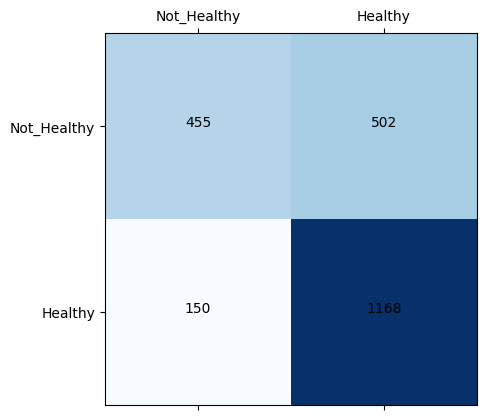

In [14]:
from sklearn.metrics import confusion_matrix,classification_report
conf_matrix = confusion_matrix(Y_train, ytp)
showConfMat(conf_matrix)

In [15]:
print(classification_report(Y_train,ytp,labels = ['0','1']))
print(classification_report(Y_test,ysp,labels = ['0','1']))

              precision    recall  f1-score   support

           0       0.75      0.48      0.58       957
           1       0.70      0.89      0.78      1318

   micro avg       0.71      0.71      0.71      2275
   macro avg       0.73      0.68      0.68      2275
weighted avg       0.72      0.71      0.70      2275

              precision    recall  f1-score   support

           0       0.62      0.42      0.50       418
           1       0.65      0.81      0.72       557

   micro avg       0.64      0.64      0.64       975
   macro avg       0.63      0.61      0.61       975
weighted avg       0.63      0.64      0.62       975



/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/pytho

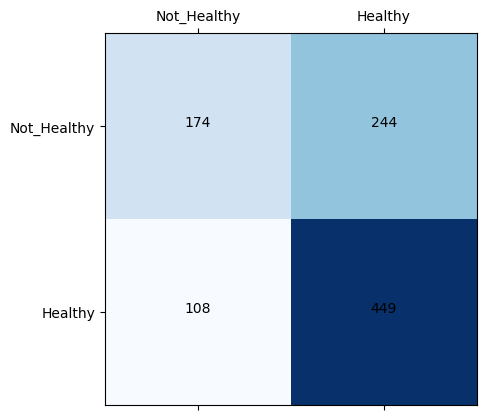

In [16]:
from sklearn.metrics import confusion_matrix,classification_report
conf_matrix = confusion_matrix(Y_test, ysp)
showConfMat(conf_matrix)

# 9 Conclusions

From the above results we can conclude that:-

1.The model perform reasonably well, with notable strengths in predicting healthy dishes.
2.Class imbalance may impact the performance, as indicated by differences in precision and recall for the two classes.

#Suggestions

1. Further optimization and fine-tuning of the models could potentially enhance their predictive capabilities.
2.Interpretation should consider the specific context and importance of precision and recall based on the application.